### 1. Veri Setinin Kısa Hikayesi

Bu veri seti, Marvel ve DC evrenlerindeki süper kahramanların fiziksel ve zihinsel özelliklerini bir araya getirir.
Kahramanların cinsiyeti, ırkı, güç, hız, zeka ve tarafı (iyi, kötü, tarafsız) gibi bilgileri içerir.
Amaç, kahramanların özellikleri ile onların karakter eğilimleri arasındaki ilişkileri inceleyerek veri bilimiyle çizgi roman dünyasına analitik bir bakış sunmaktır.

Veri Kaynağı: Kaggle – Superheroes Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
heroes = pd.read_csv("/Users/reyhansenayilmaz/Documents/superheroes_analysis.csv/data/heroes_information.csv")


In [3]:
heroes= heroes.drop('Unnamed: 0', axis=1)
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [4]:
heroes.dtypes

name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [5]:
print("Dataset Shape:", heroes.shape)
print("\nColumns:", list(heroes.columns))
print(heroes.isnull().sum())

Dataset Shape: (734, 10)

Columns: ['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64


In [6]:
heroes.replace(-99.0, np.nan, inplace=True)
heroes.replace('-', 'Unknown' , inplace=True)
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN


### 2. Temel Veri Analizi (EDA)

In [7]:
heroes.describe()

,Height,Weight
count,517.000000,495.000000
mean,186.726306,112.252525
std,59.251895,104.151142
min,15.200000,2.000000
25%,173.000000,61.000000
50%,183.000000,81.000000
75%,191.000000,108.000000
max,975.000000,900.000000


In [8]:
heroes.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [9]:
heroes.size

7340

In [10]:
heroes['Alignment'].unique()

array(['good', 'bad', 'Unknown', 'neutral'], dtype=object)

In [11]:
heroes['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [12]:
heroes['Gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [13]:
heroes['Weight'].value_counts()

Weight
54.0     23
79.0     23
81.0     22
90.0     19
52.0     15
         ..
268.0     1
16.0      1
167.0     1
45.0      1
17.0      1
Name: count, Length: 134, dtype: int64

In [14]:
heroes['Skin color'] = heroes['Skin color'].replace('-', np.nan)
heroes

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,Unknown,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,NaN
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,Unknown,good,57.0


In [15]:
heroes = heroes.drop_duplicates()

Value Counts

In [16]:
heroes["Alignment"].value_counts()

Alignment
good       495
bad        207
neutral     24
Unknown      7
Name: count, dtype: int64

In [17]:
heroes[heroes["Alignment"] == "bad"]["Gender"].value_counts()
#Kötü kahramanların cinsiyet dağılımları

Gender
Male       165
Female      35
Unknown      7
Name: count, dtype: int64

In [18]:
heroes[heroes["Hair color"] == "Black"]["Gender"].value_counts()
# saçı siyah olanların cinsiyet dağılımı

Gender
Male       110
Female      45
Unknown      3
Name: count, dtype: int64

In [19]:
print(heroes[["Height", "Weight"]].describe())

           Height      Weight
count  517.000000  495.000000
mean   186.726306  112.252525
std     59.251895  104.151142
min     15.200000    2.000000
25%    173.000000   61.000000
50%    183.000000   81.000000
75%    191.000000  108.000000
max    975.000000  900.000000


Kategorik ve sayısal değişkenlerin dağılımı:

In [20]:
categorical_cols = heroes.select_dtypes(include="object").columns.tolist()
numerical_cols = heroes.select_dtypes(exclude="object").columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Publisher', 'Skin color', 'Alignment']
Numerical Columns: ['Height', 'Weight']


In [21]:
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(heroes[col].value_counts().head(10))


name Value Counts:
name
Spider-Man     3
Vindicator     2
Nova           2
Speedy         2
Batman         2
Angel          2
Namor          2
Toxin          2
Blue Beetle    2
Batgirl        2
Name: count, dtype: int64

Gender Value Counts:
Gender
Male       504
Female     200
Unknown     29
Name: count, dtype: int64

Eye color Value Counts:
Eye color
blue       225
Unknown    171
brown      126
green       73
red         46
black       23
yellow      19
white       17
grey         6
hazel        6
Name: count, dtype: int64

Race Value Counts:
Race
Unknown              304
Human                207
Mutant                63
God / Eternal         14
Human / Radiation     11
Cyborg                11
Android                9
Symbiote               9
Kryptonian             7
Alien                  7
Name: count, dtype: int64

Hair color Value Counts:
Hair color
Unknown             171
Black               158
Blond                99
Brown                86
No Hair              75
Red       

Aykırı Değer Analizi

In [22]:
def detect_outliers_IQR(heroes, col):
    Q1 = heroes[col].quantile(0.25)
    Q3 = heroes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = heroes[(heroes[col] < lower_limit) | (heroes[col] > upper_limit)]

    print(f"\n{col} Outlier Summary:")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Limit: {lower_limit:.2f}")
    print(f"Upper Limit: {upper_limit:.2f}")
    print(f"Outlier Count: {outliers.shape[0]} ({round(outliers.shape[0] / heroes[col].dropna().shape[0] * 100, 2)}%)")

    return outliers

outliers_height = detect_outliers_IQR(heroes, "Height")
outliers_weight = detect_outliers_IQR(heroes, "Weight")



Height Outlier Summary:
Q1 (25%): 173.00
Q3 (75%): 191.00
IQR: 18.00
Lower Limit: 146.00
Upper Limit: 218.00
Outlier Count: 42 (8.12%)

Weight Outlier Summary:
Q1 (25%): 61.00
Q3 (75%): 108.00
IQR: 47.00
Lower Limit: -9.50
Upper Limit: 178.50
Outlier Count: 60 (12.12%)


In [23]:
heroes["Height"] = heroes["Height"].replace(-99, np.nan)
heroes["Weight"] = heroes["Weight"].replace(-99, np.nan)
#-99 değerini nan yapatım

/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_19685/3430428405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes["Height"] = heroes["Height"].replace(-99, np.nan)
/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_19685/3430428405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes["Weight"] = heroes["Weight"].replace(-99, np.nan)


In [24]:
missing_count = heroes[["Height", "Weight"]].isnull().sum()
missing_percent = (heroes[["Height", "Weight"]].isnull().mean() * 100).round(2)

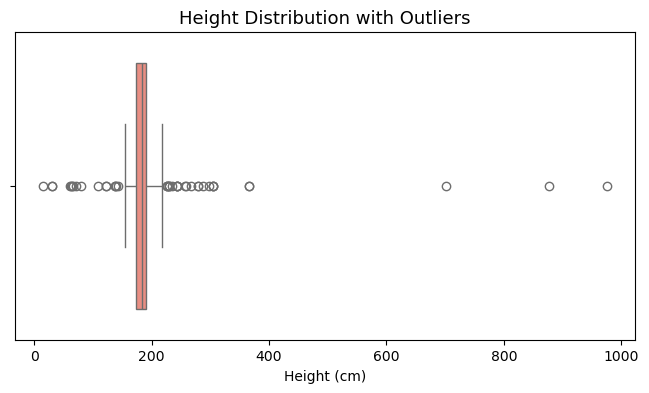

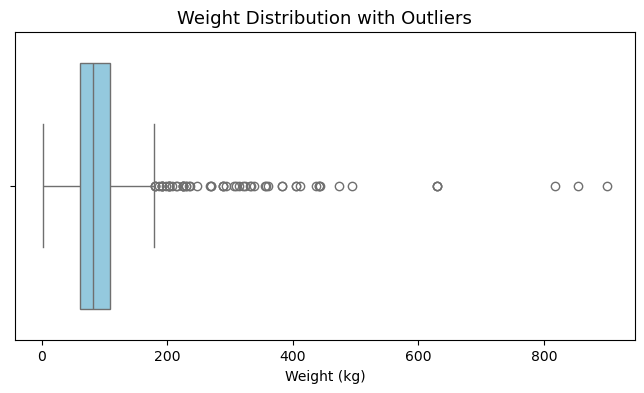

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(data=heroes, x="Height", color="salmon")
plt.title("Height Distribution with Outliers", fontsize=13)
plt.xlabel("Height (cm)")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=heroes, x="Weight", color="skyblue")
plt.title("Weight Distribution with Outliers", fontsize=13)
plt.xlabel("Weight (kg)")
plt.show()

### 3. Veri Görselleştirme

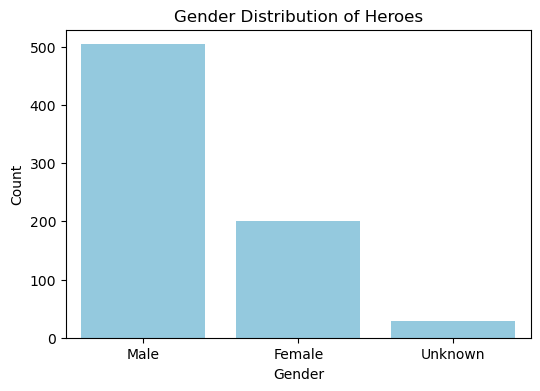

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=heroes, x="Gender", color="skyblue") 
plt.title("Gender Distribution of Heroes")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
#cinsiyete göre dağılım

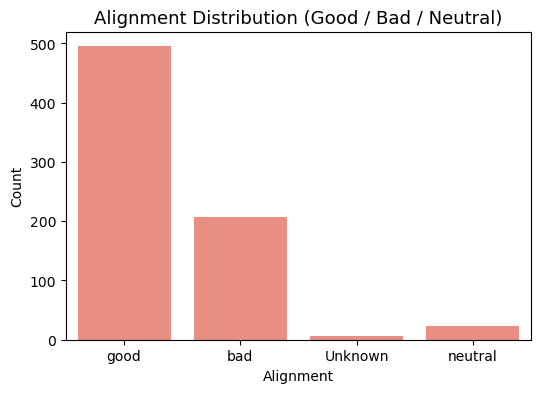

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=heroes, x="Alignment", color="salmon") 
plt.title("Alignment Distribution (Good / Bad / Neutral)", fontsize=13) 
plt.xlabel("Alignment") 
plt.ylabel("Count")
plt.show()

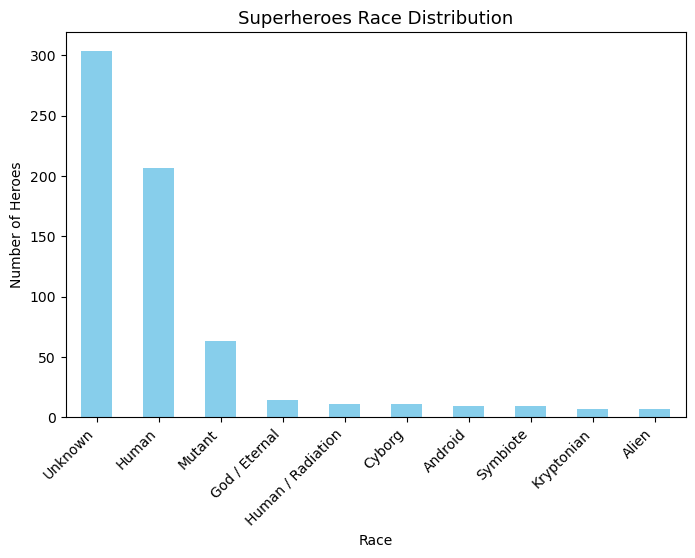

In [28]:
race_counts = heroes['Race'].value_counts().head(10)

plt.figure(figsize=(8,5))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Superheroes Race Distribution', fontsize=13)
plt.xlabel('Race')
plt.ylabel('Number of Heroes')
plt.xticks(rotation=45, ha='right')
plt.show()


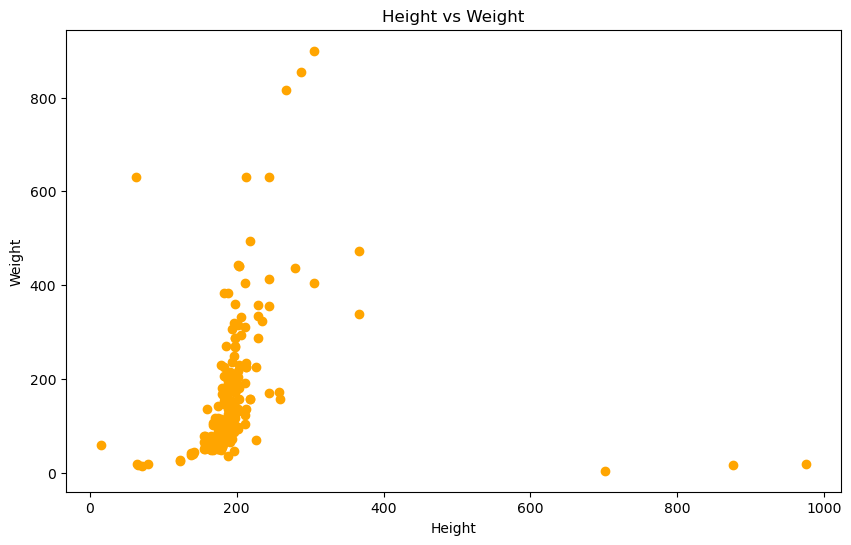

In [29]:
df_cleaned = heroes.dropna()
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned['Height'], df_cleaned['Weight'], color='#FFA500')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

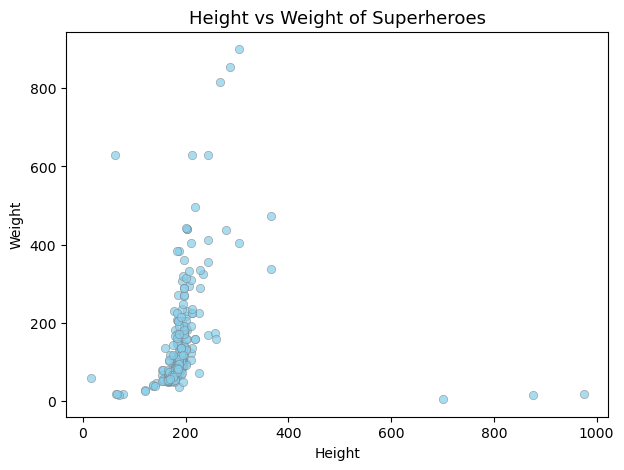

In [30]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=heroes[heroes["Alignment"] != "Unknown"], 
    x="Height",y="Weight",color="skyblue",   
    alpha=0.7,edgecolor="gray" )  
plt.title("Height vs Weight of Superheroes", fontsize=13)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

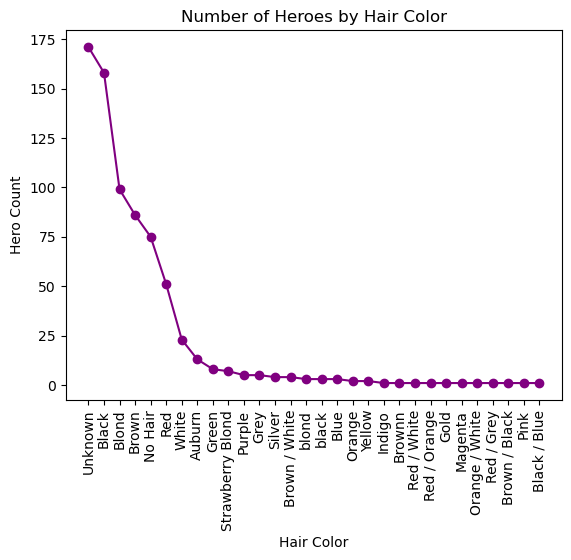

In [31]:
hair_color_count = heroes['Hair color'].value_counts()
x = hair_color_count.index
y = hair_color_count.values
plt.plot(x, y, marker='o',color="purple")
plt.xlabel('Hair Color')
plt.ylabel('Hero Count')
plt.title('Number of Heroes by Hair Color')
plt.xticks(rotation=90) 
plt.show()


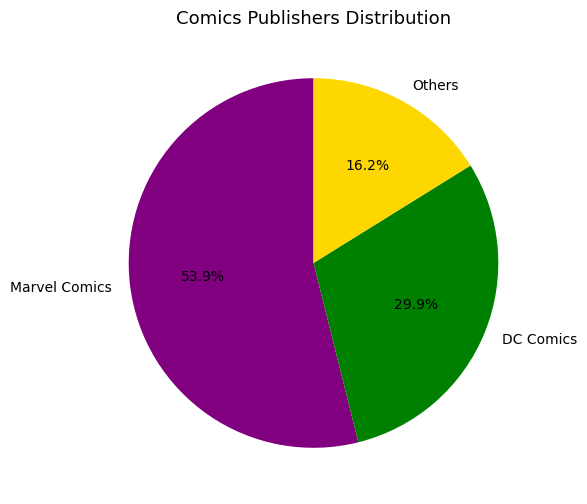

In [32]:
hero_p = heroes.Publisher.value_counts()
hero_p = pd.DataFrame({
    'label': ['Marvel Comics', 'DC Comics', 'Others'],
    'value': hero_p[:2].values.tolist() + [hero_p[2:].sum()]
}) 
plt.figure(figsize=(6,6))                      
plt.pie(hero_p['value'],                       
        labels=hero_p['label'],               
        autopct='%1.1f%%',                     
        startangle=90,                        
        colors=['purple', 'green', 'gold' ])
plt.title('Comics Publishers Distribution', fontsize=13)
plt.show()

#Marvel ve Dc en fazla olduğu için bunu görselleştirmek istedim

### 4. Veri Ön İşleme

In [33]:
heroes.isnull().sum()

name            0
Gender          0
Eye color       0
Race            0
Hair color      0
Height        216
Publisher      15
Skin color      0
Alignment       0
Weight        238
dtype: int64

In [34]:
heroes['Height'] = heroes['Height'].fillna(heroes['Height'].mean())
heroes['Weight'] = heroes['Weight'].fillna(heroes['Weight'].mean())
# Boy ve kilo sütunlarındaki eksik değeleri ortalama ile doldurdum
heroes = heroes[['Height', 'Weight']]
heroes.head(10)


/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_19685/3944506353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes['Height'] = heroes['Height'].fillna(heroes['Height'].mean())
/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_19685/3944506353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes['Weight'] = heroes['Weight'].fillna(heroes['Weight'].mean())


,Height,Weight
0,203.000000,441.000000
1,191.000000,65.000000
2,185.000000,90.000000
3,203.000000,441.000000
4,186.726306,112.252525
5,193.000000,122.000000
6,186.726306,112.252525
7,185.000000,88.000000
8,173.000000,61.000000
9,178.000000,81.000000


In [35]:
heroes.isnull().sum()
#eksik veri kontolü yaptım

Height    0
Weight    0
dtype: int64

Kategorik Değişkenler İçin Encoding 

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [37]:
heroes = pd.read_csv("/Users/reyhansenayilmaz/Documents/superheroes_analysis.csv/data/heroes_information.csv")
#tekrar veri setini yükledim çünkü bazı kodlar için heroesi değiştirmiştim tekrardan yüklemek gerekti
print(heroes.columns.to_list())

['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']


In [38]:
heroes.fillna({
    'Gender': 'Unknown',
    'Race': 'Unknown',
    'Publisher': 'Unknown',
    'Alignment': 'Unknown'
}, inplace=True)
label_encoder = LabelEncoder()

heroes['Gender_encoded'] = label_encoder.fit_transform(heroes['Gender'])
heroes['Alignment_encoded'] = label_encoder.fit_transform(heroes['Alignment'])
heroes['Publisher_encoded'] = label_encoder.fit_transform(heroes['Publisher'])
heroes['Race_encoded'] = label_encoder.fit_transform(heroes['Race'])


In [39]:
heroes = pd.get_dummies(
    heroes,
    columns=['Gender', 'Alignment', 'Publisher', 'Race'],
    prefix=['Gen', 'Ali', 'Pub', 'Race'],
    drop_first=True
)
print("Encoded columns:", heroes.columns[: 10]) 
heroes.head()


Encoded columns: Index(['Unnamed: 0', 'name', 'Eye color', 'Hair color', 'Height', 'Skin color',
       'Weight', 'Gender_encoded', 'Alignment_encoded', 'Publisher_encoded'],
      dtype='object')


,Unnamed: 0,name,Eye color,Hair color,Height,Skin color,Weight,Gender_encoded,Alignment_encoded,Publisher_encoded,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
0,0,A-Bomb,yellow,No Hair,203.0,-,441.0,2,2,11,...,False,False,False,False,False,False,False,False,False,False
1,1,Abe Sapien,blue,No Hair,191.0,blue,65.0,2,2,2,...,False,False,False,False,False,False,False,False,False,False
2,2,Abin Sur,blue,No Hair,185.0,red,90.0,2,2,1,...,False,False,False,True,False,False,False,False,False,False
3,3,Abomination,green,No Hair,203.0,-,441.0,2,1,11,...,False,False,False,False,False,False,False,False,False,False
4,4,Abraxas,blue,Black,-99.0,-,-99.0,2,1,11,...,False,False,False,False,False,False,False,False,False,False


Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
num_cols = ['Height', 'Weight'] #nümerik olanlar bunlar olduğu için 
heroes[num_cols] = scaler.fit_transform(heroes[num_cols])
print(heroes[num_cols].head())

     Height    Weight
0  0.722041  3.037800
1  0.636037  0.161739
2  0.593036  0.352966
3  0.722041  3.037800
4 -1.442378 -1.092714


### 5. Basit Bir Modelleme

In [42]:
heroes.head()

,Unnamed: 0,name,Eye color,Hair color,Height,Skin color,Weight,Gender_encoded,Alignment_encoded,Publisher_encoded,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
0,0,A-Bomb,yellow,No Hair,0.722041,-,3.037800,2,2,11,...,False,False,False,False,False,False,False,False,False,False
1,1,Abe Sapien,blue,No Hair,0.636037,blue,0.161739,2,2,2,...,False,False,False,False,False,False,False,False,False,False
2,2,Abin Sur,blue,No Hair,0.593036,red,0.352966,2,2,1,...,False,False,False,True,False,False,False,False,False,False
3,3,Abomination,green,No Hair,0.722041,-,3.037800,2,1,11,...,False,False,False,False,False,False,False,False,False,False
4,4,Abraxas,blue,Black,-1.442378,-,-1.092714,2,1,11,...,False,False,False,False,False,False,False,False,False,False


In [43]:
heroes.dropna(inplace=True)
print(heroes.isnull().sum())

Unnamed: 0              0
name                    0
Eye color               0
Hair color              0
Height                  0
                       ..
Race_Xenomorph XX121    0
Race_Yautja             0
Race_Yoda's species     0
Race_Zen-Whoberian      0
Race_Zombie             0
Length: 101, dtype: int64


In [44]:
heroes.columns

Index(['Unnamed: 0', 'name', 'Eye color', 'Hair color', 'Height', 'Skin color',
       'Weight', 'Gender_encoded', 'Alignment_encoded', 'Publisher_encoded',
       ...
       'Race_Symbiote', 'Race_Talokite', 'Race_Tamaranean', 'Race_Ungaran',
       'Race_Vampire', 'Race_Xenomorph XX121', 'Race_Yautja',
       'Race_Yoda's species', 'Race_Zen-Whoberian', 'Race_Zombie'],
      dtype='object', length=101)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = heroes.copy()
df.columns = df.columns.str.strip()

if "Ali_good" in df.columns:
    y = df["Ali_good"].astype(int)
    leak_cols = [c for c in df.columns if c.startswith("Ali_")]  # drop Ali_bad, Ali_neutral, Ali_good from X
elif "Alignment" in df.columns:
    y = df["Alignment"].astype(str).str.lower().map({"good": 1}).fillna(0).astype(int)
    leak_cols = ["Alignment"]
else:
    raise ValueError("Neither 'Ali_good' nor 'Alignment' found. Provide one of them to build the target.")

drop_exact = [c for c in ["Unnamed: 0","name","Eye color","Hair color","Skin color"] if c in df.columns]
X = df.drop(columns=drop_exact + leak_cols, errors="ignore")
y = y.loc[X.index]

strat = y if y.nunique() >= 2 else None
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=strat
)

num_cols   = [c for c in ["Height","Weight"] if c in X.columns]
other_cols = [c for c in X.columns if c not in num_cols]

from sklearn.pipeline import Pipeline
num_pipe = Pipeline([("impute", SimpleImputer(strategy="median")),
                     ("scale",  StandardScaler())])
other_pipe = Pipeline([("impute", SimpleImputer(strategy="most_frequent"))])

preprocess = ColumnTransformer([
    ("num",   num_pipe,   num_cols),
    ("other", other_pipe, other_cols),
], remainder="drop")


logreg = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=3000, class_weight="balanced", solver="lbfgs")),
])

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy :", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred, zero_division=0), 3))
print("Recall   :", round(recall_score(y_test, y_pred, zero_division=0), 3))

Accuracy : 0.966
Precision: 0.97
Recall   : 0.98


### 6. Sonuçların Yorumlanması

İlk olarak accuracy(doğruluk) değerine bakalım

In [46]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9659863945578231

Doğruluk değeri %97 bu oldukça yüksek bir değer bundan dolayı overfitting olma ihtimalinden şüphelendim

In [47]:
train_pred = logreg.predict(X_train)
test_pred  = logreg.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc  = accuracy_score(y_test, test_pred)
train_f1  = f1_score(y_train, train_pred)
test_f1   = f1_score(y_test, test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}")
print(f"Train F1-score: {train_f1:.3f}")
print(f"Test  F1-score: {test_f1:.3f}")

Train Accuracy: 0.957
Test  Accuracy: 0.966
Train F1-score: 0.969
Test  F1-score: 0.975


Eğitim ve test skorları birbirine çok yakın olduğu için overfitting yoktur diyorum

In [48]:
print(y_test.value_counts())

Ali_good
1    99
0    48
Name: count, dtype: int64


Dağılım makuldür

Publisher "DC" veya "Marvel" olduğunda "good" olasılığı artıyor model bunu öğrenmiştir

"Human", "Mutant", "Alien" gibi türlerin kahramanlıkla ilişkisini anlamış olabilir

Bu özellikler çok açık olduğu için logistic regresyonla model başarılı olmuştur